<a href="https://colab.research.google.com/github/desaraju02/ai_ml_dl/blob/main/Handwritten_Digits_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import datetime as dt
import seaborn as sns
import platform
import os

from tensorflow import keras


In [15]:
mnist_data = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist_data.load_data()

# x_train = tf.keras.utils.normalize(x_train, axis=1)
# x_test = tf.keras.utils.normalize(x_test, axis=1)

In [16]:
x_train.shape

(60000, 28, 28)

In [17]:
x_test.shape

(10000, 28, 28)

In [18]:
y_train.shape

(60000,)

In [19]:
y_test.shape

(10000,)

In [20]:
x_train[0].shape

(28, 28)

In [21]:
y_train[0]

5

In [22]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [23]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [24]:
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


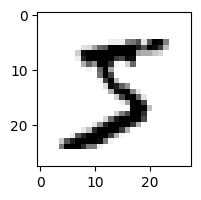

In [27]:
plt.figure(figsize=(2, 2))
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

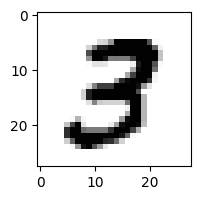

In [28]:
plt.figure(figsize=(2, 2))
plt.imshow(x_train[7], cmap=plt.cm.binary)
plt.show()

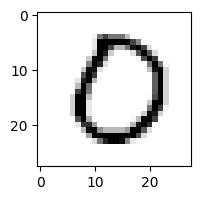

In [33]:
plt.figure(figsize=(2, 2))
plt.imshow(x_train[10254], cmap=plt.cm.binary)
plt.show()

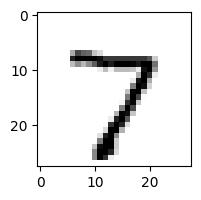

In [34]:
plt.figure(figsize=(2, 2))
plt.imshow(x_test[0], cmap=plt.cm.binary)
plt.show()

In [35]:
pd.DataFrame(y_train).value_counts()

,count
0,
1,6742
7,6265
3,6131
2,5958
9,5949
0,5923
6,5918
8,5851
4,5842


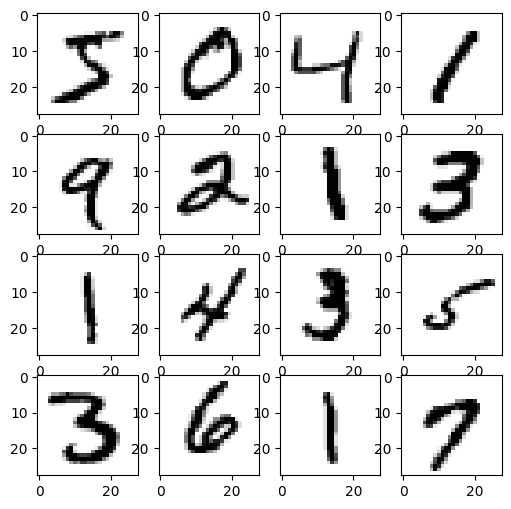

In [37]:
n=16
num_cells = math.ceil(math.sqrt(n))
plt.figure(figsize=(6, 6))
for i in range(n):
    plt.subplot(num_cells, num_cells, i+1)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
plt.show()

# Normalize the data

In [38]:
x_train_normalized = x_train/255
x_test_normalized = x_test/255

In [39]:
x_train_normalized.min(), x_train_normalized.max()

(0.0, 1.0)

In [40]:
x_test_normalized.min(), x_test_normalized.max()

(0.0, 1.0)

# **Build the model**
We will use Sequential Keras model with 4 layers:

Layer 1: Flatten layer that will flatten image 2D matrix into 1D vector.

Layer 2: Input Dense layer with 128 neurons and ReLU activation.

Layer 3: Hidden Dense layer with 128 neurons and ReLU activation.

Layer 4: Output Dense layer with 10 Softmax outputs.

The output represents the network guess. The 0-th output represents a probability that the input digit is 0, the 1-st output represents a probability that the input digit is 1 and so on...
In this example we will use kernel_regularizer parameter of the layer to control overfitting of the model. Another common approach to fight overfitting though might be using a [dropout layers](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout) (i.e.tf.keras.layers.Dropout(0.2)).

In [41]:
model = tf.keras.models.Sequential() # gives the linear stack of layers - sequential object

#--------------#
# Input Layer
model.add(tf.keras.layers.Flatten(input_shape = x_train_normalized.shape[1:]))
model.add(tf.keras.layers.Dense(
    units = 128,
    activation = tf.keras.activations.relu,
    kernel_regularizer = tf.keras.regularizers.l2(0.002)
))

#--------------#
# Hidden Layer
model.add(tf.keras.layers.Dense(
    units = 128,
    activation = tf.keras.activations.relu,
    kernel_regularizer = tf.keras.regularizers.l2(0.002)
))

#--------------#
# Output Layer
model.add(tf.keras.layers.Dense(
    units = 10,
    activation = tf.keras.activations.softmax
))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [42]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)